 # <center>**Project 7: Introduction to Machine Learning**</center>
## <center>By: Sandra Ruiz</center>
## <center>February 19, 2024</center>
                         

## Overview

In this project a model will be created to make predictions and visualize the data using machine learning and linear regression.

In [9]:
## Dependencies Needes:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import pyarrow
import scipy    

## 7.1 Project Setup and Start

New repository in Github created and cloned into VS with:

''' git clone https://github.com/S572396/datafun-07-ml

A vtirual environment was created and activated with:

py -m venv .venv

and actived by:

.\ . venv\Scripts\activate

'''

pip upgraed with:

'''
py -m pip install requests --upgrade pip

Requirements installed with:

pip install jupyterlab pandas pyarrow matplotlib seaborn scipy

Requirements txt file created with:

py -m pip freeze > requirements.txt

.gitignore file created by right click, new file, rename to .gitignore
'''
Project sent to GitHub repository by:

'''
git add . git commit -m "README.md update" git push -u origin main

## 7.2 Examples of Chapter 10

* Please see File ch.10.examples.py where a deck of 52 playing cards prints the original deck and prints the listing of a shuffled deck. Cards are sucessfully shuffled with new values displayed

## 7.3 Machine Learning Exampe of Chapter 15

* Please see example from Folder named ch.15.examples. Data from nyc csv file is used to make predictions for 3 different years and simple linear regression chart is displayed.

## 7.4 Start a New Notebook

* sandraruiz_ml.ipynb file created, git pull was run . 
* Updated author tile and import statements
* git add, git commit, and git push to orign run.

## 7.5 Chart a Straight Line: Part 1
* Using Instructions from Chaper 10.16 to plot Celsius vs Fahrenheit


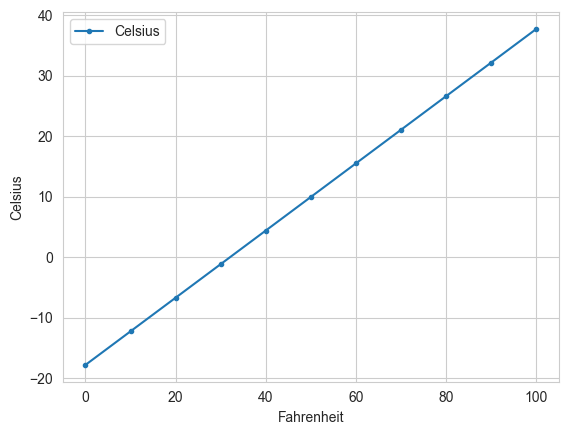

In [10]:
import pandas as pd

# Create Lambda
celsius_conversion = lambda f: 5/9 * (f - 32)
temps = [(f, celsius_conversion(f)) for f in range(0, 101, 10)]

# Create DataFrame
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

# Plot DataFrame with dots and lines
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')


## 7.6 Predict Avg High Temp in NYC in January: Part 2

### Introduction
Here we will look at the avg hight temperatures in NYC from 1895-2018. Predictions will also be made.

### Dependencies Used:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

### 1. Data Acquisition
Website: https://www.ncdc.noaa.gov/cag/
* Dataframe downloaded and saved under nyc_df.csv

* Equation Reference: (y = mx +b)

### 2. Data Inspection

In [11]:
import pandas as pd
import os


current_directory = os.getcwd()

file_path = os.path.join(current_directory, 'nyc.csv')

nyc = pd.read_csv(file_path, encoding='utf-8')

# Display the first 4 rows (head)
print("Head of the data:")
print(nyc.head(4))

# Display the last 4 rows (tail)
print("\nTail of the data:")
print(nyc.tail(4))


Head of the data:
     Date  Value  Anomaly
0  189501  26.69    -3.43
1  189601  31.48     1.36
2  189701  28.17    -1.95
3  189801  30.67     0.55

Tail of the data:
       Date  Value  Anomaly
120  201501  33.08     2.96
121  201601  32.22     2.10
122  201701  33.57     3.45
123  201801  32.16     2.04


### 3. Data Cleaning

In [12]:
###Rename 'Value' column as 'Temperature'

nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'
print(nyc.head(3))


     Date  Temperature  Anomaly
0  189501        26.69    -3.43
1  189601        31.48     1.36
2  189701        28.17    -1.95


In [13]:
### to view data type
nyc.Date.dtype


dtype('int64')

In [14]:
import pandas as pd
import os


current_directory = os.getcwd()

file_path = os.path.join(current_directory, 'nyc.csv')

nyc = pd.read_csv(file_path, encoding='utf-8')

### To fix date:
nyc.Date= nyc.Date.floordiv(100)
print(nyc.head(3))


   Date  Value  Anomaly
0  1895  26.69    -3.43
1  1896  31.48     1.36
2  1897  28.17    -1.95


### 4. Descriptive Statistics

In [15]:
### using the describe () and set precison
import pandas as pd

nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'

pd.set_option('display.precision', 2)
nyc.Temperature.describe()



count    124.00
mean      30.46
std        3.06
min       21.90
25%       29.04
50%       30.67
75%       32.32
max       38.93
Name: Temperature, dtype: float64

### 5. Build the Model

### Introduction: Use SciPy stats module linregress function to calculate slope and intercept for the best fit line for the data.

In [16]:
### Dependency Imports:

from scipy import stats
import pandas as pd
import os



# Load the DataFrame from the CSV file
nyc = pd.read_csv('nyc.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'



linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

slope = linear_regression.slope

print(slope)


0.0001785340676632572


In [17]:
from scipy import stats
import pandas as pd

# Load the DataFrame from the CSV file
nyc = pd.read_csv('nyc.csv')

nyc.columns = ['Date', 'Temperature', 'Anomaly']  # Rename 'Value' column as 'Temperature'

# Perform linear regression
linear_regression = stats.linregress(x=nyc['Date'].values, y=nyc['Temperature'].values)

# Access the slope
intercept = linear_regression.intercept

print(intercept)




-4.472143065932325


### 6. Predict the "avg high temp in Jan" for the year 2024:

In [18]:
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, y= nyc.Temperature)

linear_regression.slope * 2024 + linear_regression.intercept

-4.110790112981893

### 7. Visualizations: Use Seaborn to do a scatterplot to find the best fit line

(10.0, 70.0)

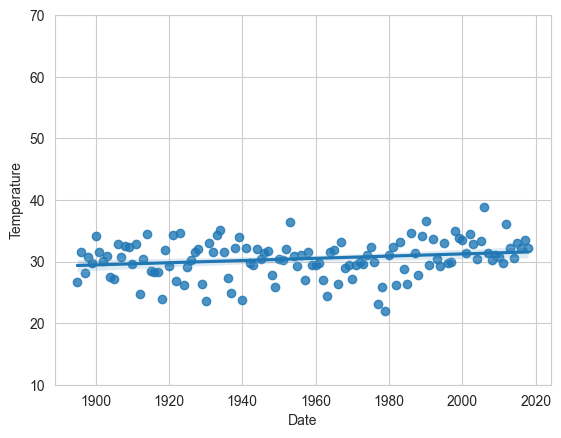

In [19]:
import seaborn as sns
sns.set_style ('whitegrid')
nyc.Date= nyc.Date.floordiv(100)
axes = sns.regplot(x=nyc.Date, y =nyc.Temperature)
axes.set_ylim (10,70)